In [2]:
# from facebook_scraper import get_posts
# import pandas as pd
# posts_list = []
# for post in get_posts('SudanPMHamdok', pages=1):
#     posts_list.append(post)

# posts = pd.DataFrame(posts_list)
# posts

/home/siddig/.local/lib/python3.8/site-packages/facebook_scraper/facebook_scraper.py:440: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/page_content_list_view/more/?page_id=109855750397935&start_cursor=%7B%22timeline_cursor%22:%22AQHRlJt2DwXckpBM1i-q_pBZrxjwtB6GShuNIBxSsnNxSDoPLcoD8p_o-SKKJonI3vJnp1qMTdIS5Xd-xIiA_ZGNofgwjG_hR1QqeBYzUfw3HhDEBaSGmhSJo4l500WvIB9t%22,%22timeline_section_cursor%22:null,%22has_next_page%22:true%7D&num_to_fetch=4&surface_type=posts_tab
  warnings.warn(
/home/siddig/.local/lib/python3.8/site-packages/facebook_scraper/facebook_scraper.py:440: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/page_content_list_view/more/?page_id=109855750397935&start_cursor=%7B%22timeline_cursor%22:%22AQHR3haVkrAUInf_uSL00UShkcOeLKB65sDJygw9KBx5ERPQAddRO59XaCJjYNqVBrldNxb5IDubzTQkNftCo2l_k4GDKYZ8xrI_7Jm46S6rfl9WDjobJXhQk6rZilaL_cS3%22,%22timeline_section_cursor%22:null,%22has_next_page%22:tru

Text(0.5, 1.0, 'figure shows posts interaction in august and september')

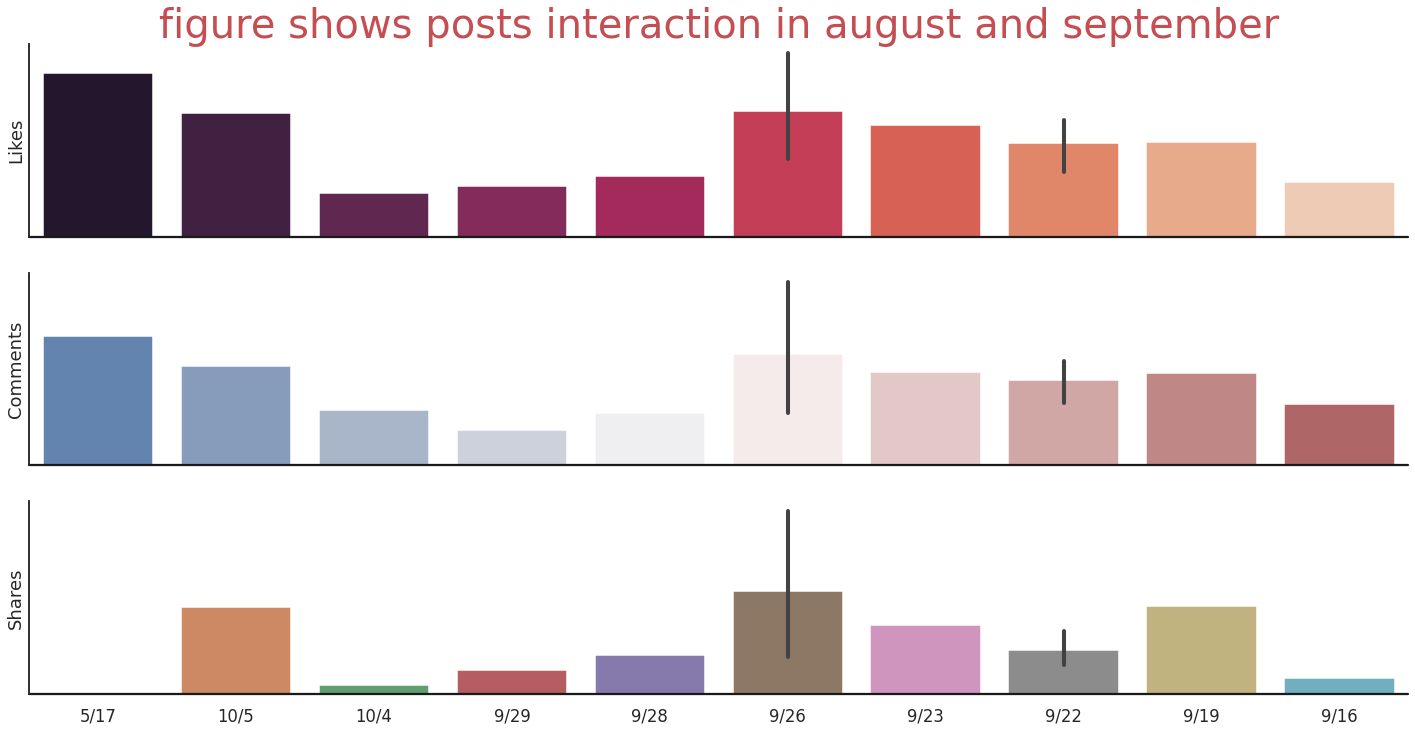

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from facebook_scraper import get_posts
import pandas as pd

posts_list = []
for post in get_posts('SudanPMHamdok', pages=5):
    posts_list.append(post)

posts = pd.DataFrame(posts_list)

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 25)
    plt.show()
    
time_list = []
for time in posts.time:
    time_list.append(str(time.month) + '/' + str(time.day))
    
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Generate some sequential data
x = time_list
y1 = posts.likes
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Likes")
# without_hue(ax1, y1)

# Center the data to make it diverging
y2 = posts.comments
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Comments")
# without_hue(ax2, y2)

# Randomly reorder the data to make it qualitative
y3 = posts.shares
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Shares")
# without_hue(ax3, y3)

# Finalize the plot

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
# plt.title("figure shows posts interaction in august and september",color='C3')
ax1.set_title("figure shows posts interaction in august and september",color='C3',size=40)